In [1]:
import sys
import os
from pathlib import Path

PROJ_NAME = "optimal-stopping"

# Locate the Project directory
curr_dir = str(Path.cwd())
start = curr_dir.find(PROJ_NAME)
if start < 0:
    print("ERROR: Project directory not found")
    print("Make sure you have the correct project structure")
    print("and run the simulation from within the project")
proj_pathname = curr_dir[:(start+len(PROJ_NAME))]

# Create path to the project directory
proj_path = Path(proj_pathname)

# Add the project folder to PATH
sys.path.append(proj_pathname)

In [5]:
import os
from pathlib import Path
import numpy as np
from scipy import stats
from bin.result_processing import loadFile
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

plt.rc('font', size = 18)
results_path = Path(proj_path/"results/raw_data")
files = os.listdir(results_path)

===For Dataset 1 using SVR with an RBF kernel===
Sensor name R5 WAITING
4
4
One-way ANOVA
F value: 43.78693606436004
P value: 9.96e-27 <= 0.05
=> Reject H0



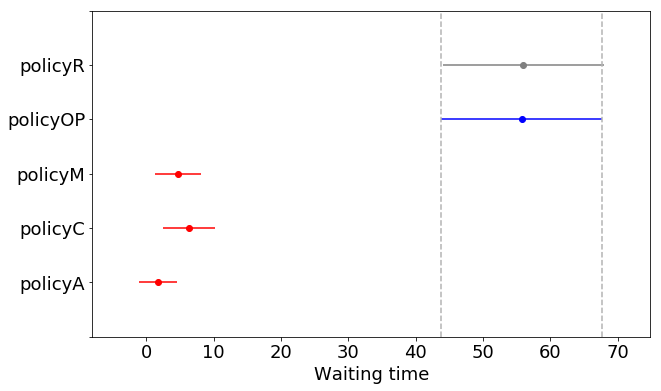

Sensor name R8 WAITING
42
3
One-way ANOVA
F value: 139.41593716214726
P value: 1.56e-64 <= 0.05
=> Reject H0



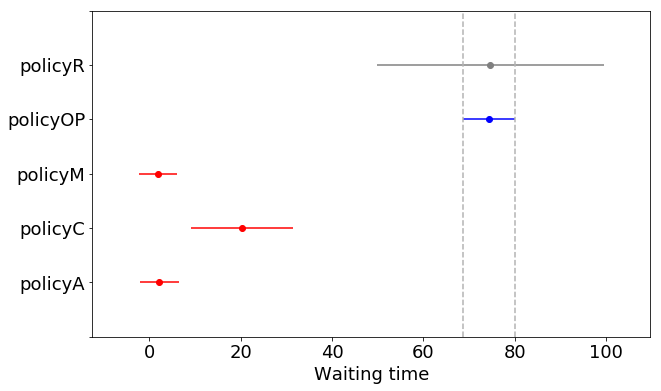

Sensor name R4 WAITING
56
4
One-way ANOVA
F value: 142.57749315042378
P value: 2.01e-65 <= 0.05
=> Reject H0



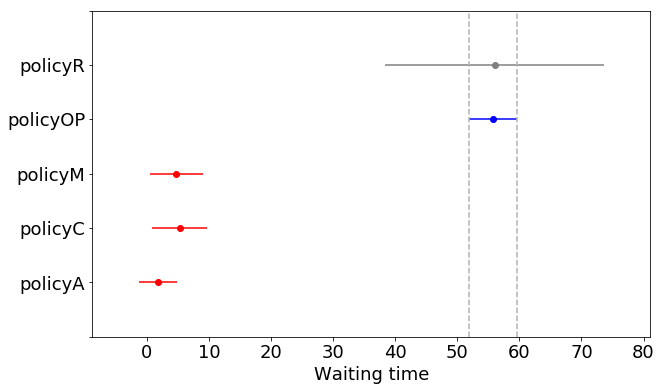

Sensor name R6 WAITING
56
4
One-way ANOVA
F value: 173.96398851129797
P value: 2.55e-76 <= 0.05
=> Reject H0



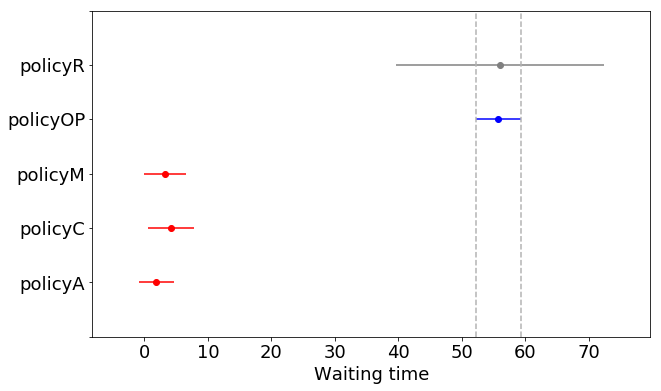

Sensor name R2 WAITING
52
3
One-way ANOVA
F value: 108.69448622522773
P value: 1.11e-53 <= 0.05
=> Reject H0



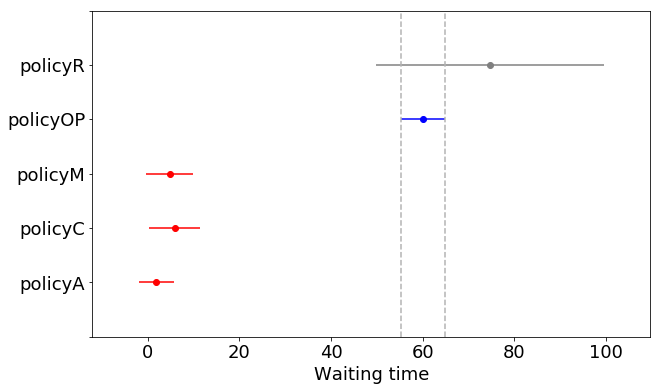

Sensor name R3 WAITING
4
4
One-way ANOVA
F value: 46.20627669052255
P value: 7.52e-28 <= 0.05
=> Reject H0



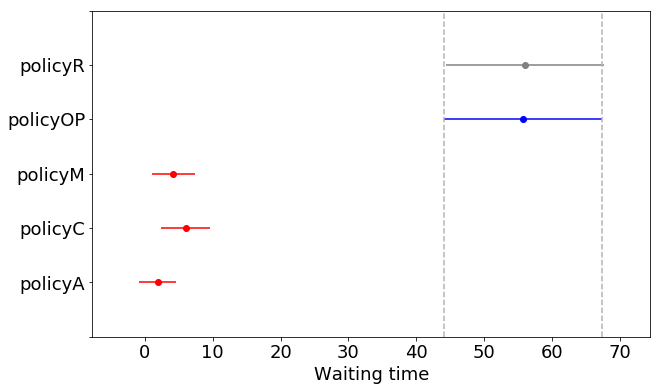

Sensor name R1 WAITING
56
4
One-way ANOVA
F value: 141.14571980275798
P value: 1.59e-66 <= 0.05
=> Reject H0



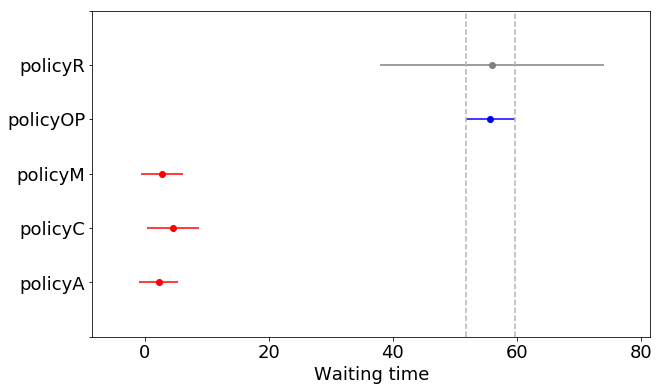

Sensor name R7 WAITING
42
3
One-way ANOVA
F value: 250.89174714370694
P value: 5.82e-95 <= 0.05
=> Reject H0



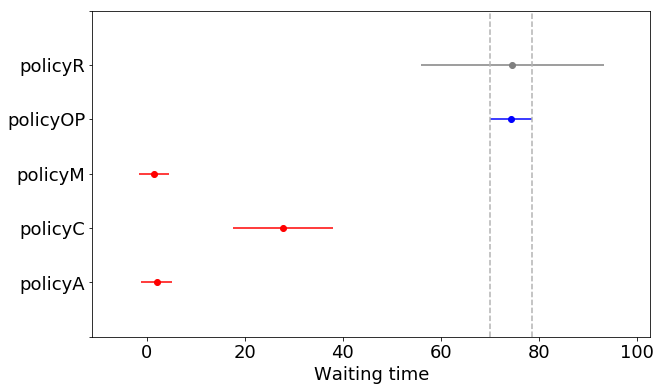

In [6]:
d1_data = {}


for filename in files:
    if filename[:12]=='waiting_time':
        with open(results_path/filename,"rb") as f:
            dataset, result = loadFile(f)
            if result.policyName == 'policyOST':
                if dataset == 1:
                    if result.sensor_name not in d1_data:
                        d1_data[result.sensor_name] = []
                    data = [('policyOP', wt) for wt in result.waiting_time]
                    d1_data[result.sensor_name] += data
            elif result.policyName != 'policyE' and result.policyName != 'policyN':
                if dataset == 1:
                    if result.sensor_name not in d1_data:
                        d1_data[result.sensor_name] = []
                    data = [(result.policyName, wt) for wt in result.waiting_time]
                    d1_data[result.sensor_name] += data

print("===For Dataset 1 using SVR with an RBF kernel===")
for sensor_name in d1_data:
    print("Sensor name", sensor_name, "WAITING")
    data = np.rec.array(d1_data[sensor_name], dtype = [('Policy','|U10'),('Waiting', '<i8')])
    print(len(data[data['Policy'] == 'policyOP'].Waiting))
    print(len(data[data['Policy'] == 'policyR'].Waiting))
    f, p = stats.f_oneway(data[data['Policy'] == 'policyA'].Waiting,
                          data[data['Policy'] == 'policyC'].Waiting,
                          data[data['Policy'] == 'policyM'].Waiting,
                          data[data['Policy'] == 'policyR'].Waiting,
                          data[data['Policy'] == 'policyOP'].Waiting)
     
    print ('One-way ANOVA')
     
    print ('F value:', f)
    if p <= 0.05:
        print ('P value: {:.2e} <= 0.05'.format(p))
        print("=> Reject H0\n")
    else:
        print ('P value: {:.2e} > 0.05'.format(p))
        print("=> Fail to reject H0\n")

    '''
    Perform Tukey T-Test
    '''

    mc = MultiComparison(data['Waiting'], data['Policy'])
    result = mc.tukeyhsd(alpha=0.05)
#     with open('results/svr_rbf_'+sensor_name+'_waiting_plot_diff_means.txt', 'w') as f:
#         f.write(str(result.summary()))
     
    fig, ax = plt.subplots()
    result.plot_simultaneous(comparison_name='policyOP', ax=ax)
    plt.xlabel('Waiting time')
    plt.title('')
    plt.show()
#     plt.savefig('results/svr_rbf_'+sensor_name+'_waiting_plot_diff_means'+'.png')
print("================================================")

===For Dataset 1 using SVR with an RBF kernel===
R4 ERROR
222
223
One-way ANOVA
F value: 5.836388099251927
P value: 2.427e-05 <= 0.05
=> Reject H0



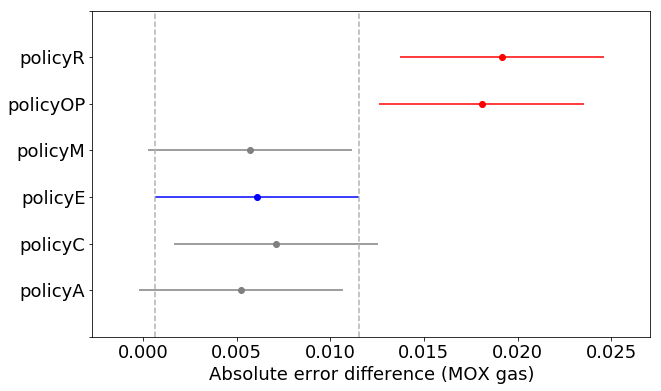

R3 ERROR
222
223
One-way ANOVA
F value: 100.8699577142786
P value: 2.565e-90 <= 0.05
=> Reject H0



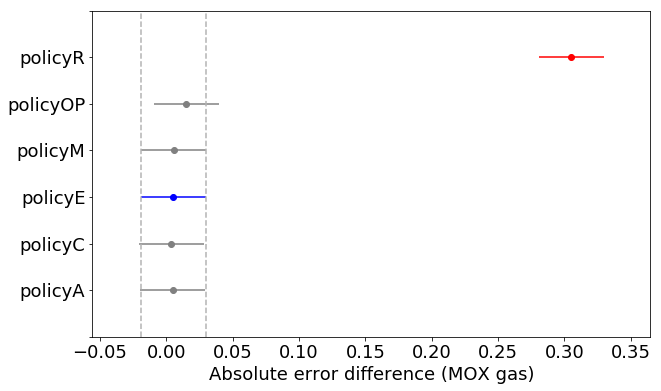

R6 ERROR
222
223
One-way ANOVA
F value: 42.39500939162846
P value: 1.297e-40 <= 0.05
=> Reject H0



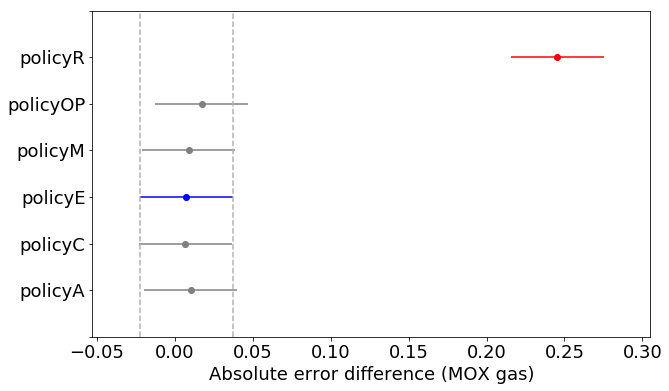

R1 ERROR
222
223
One-way ANOVA
F value: 11.325754470202234
P value: 1.021e-10 <= 0.05
=> Reject H0



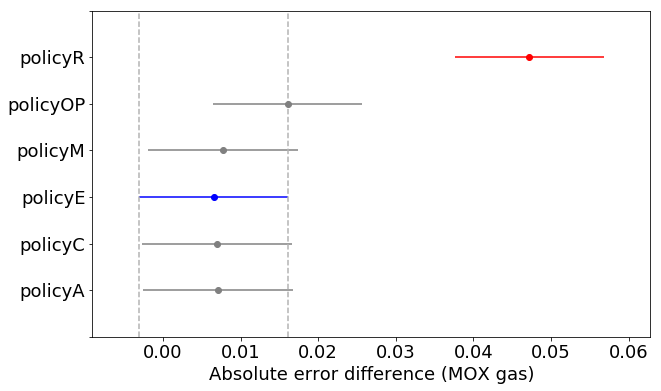

R8 ERROR
222
223
One-way ANOVA
F value: 389.66130060224083
P value: 1.450e-257 <= 0.05
=> Reject H0



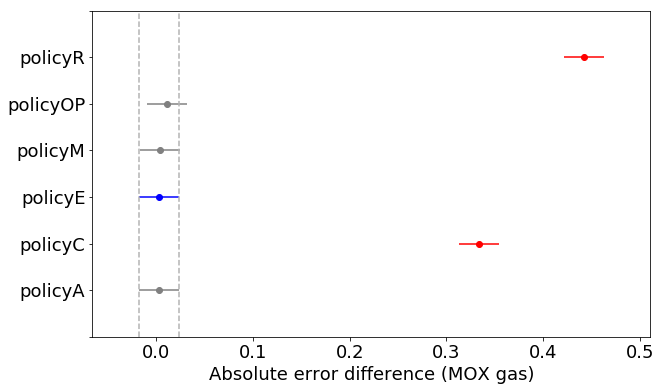

R2 ERROR
222
223
One-way ANOVA
F value: 22.76031038531502
P value: 5.706e-22 <= 0.05
=> Reject H0



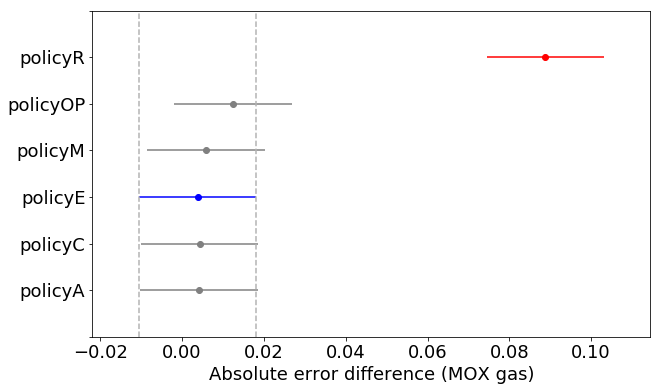

R5 ERROR
222
223
One-way ANOVA
F value: 3.6455910189218055
P value: 2.794e-03 <= 0.05
=> Reject H0



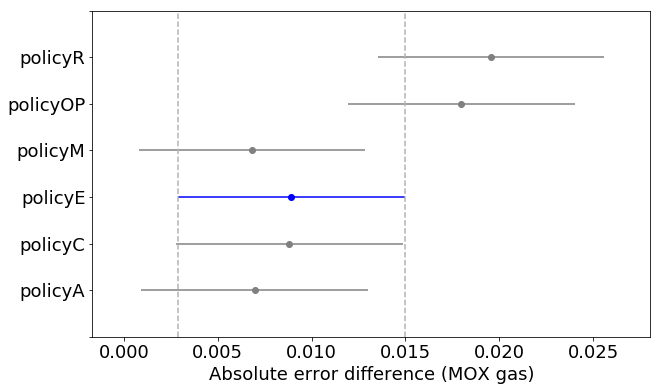

R7 ERROR
222
223
One-way ANOVA
F value: 196.7160034030924
P value: 4.369e-157 <= 0.05
=> Reject H0



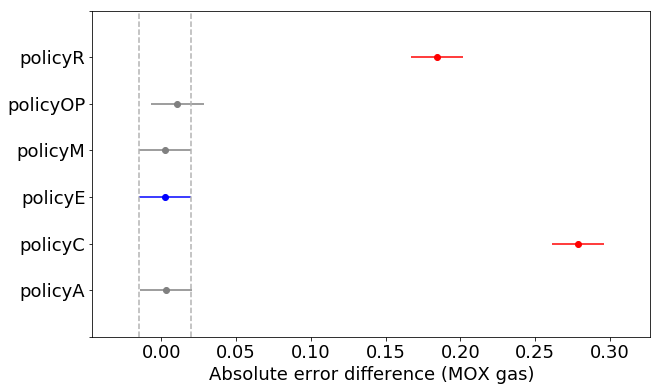

In [7]:
d1_data = {}

for filename in files:
	if filename[:7]=='results':
		with open(results_path/filename,"rb") as f:
			dataset, result = loadFile(f)
			if result.policyName == 'policyOST':
				if dataset == 1:
					if result.sensor_name not in d1_data:
						d1_data[result.sensor_name] = []
					data = [('policyOP', err) for err in result.err_diff]
					d1_data[result.sensor_name] += data
			elif result.policyName != 'policyN':
				if dataset == 1:
					if result.sensor_name not in d1_data:
						d1_data[result.sensor_name] = []
					data = [(result.policyName, err) for err in result.err_diff]
					d1_data[result.sensor_name] += data


print("===For Dataset 1 using SVR with an RBF kernel===")
for sensor_name in d1_data:
	print(sensor_name, "ERROR")
	data = np.rec.array(d1_data[sensor_name], dtype = [('Policy','|U10'),('ErrorDiff', '<f8')])
	print(len(data[data['Policy'] == 'policyOP'].ErrorDiff))
	print(len(data[data['Policy'] == 'policyR'].ErrorDiff))
	f, p = stats.f_oneway(data[data['Policy'] == 'policyC'].ErrorDiff,
	                      data[data['Policy'] == 'policyOP'].ErrorDiff,
	                      data[data['Policy'] == 'policyA'].ErrorDiff,
	                      data[data['Policy'] == 'policyR'].ErrorDiff,
	                      data[data['Policy'] == 'policyM'].ErrorDiff,
	                      data[data['Policy'] == 'policyE'].ErrorDiff)
	 
	print ('One-way ANOVA')
	 
	print ('F value:', f)
	if p <= 0.05:
		print ('P value: {:.3e} <= 0.05'.format(p))
		print("=> Reject H0\n")
	else:
		print ('P value: {:.3e} > 0.05'.format(p))
		print("=> Fail to reject H0\n")

	'''
	Perform Tukey T-Test
	'''

	mc = MultiComparison(data['ErrorDiff'], data['Policy'])
	result = mc.tukeyhsd(alpha=0.05)
# 	with open('results/svr_rbf_'+sensor_name+'_error_plot_diff_means.txt', 'w') as f:
# 		f.write(str(result.summary()))
	 
	result.plot_simultaneous(comparison_name='policyE')
	plt.xlabel('Absolute error difference (MOX gas)')
	plt.title('')
	plt.show()
# 	plt.savefig('results/svr_rbf_'+sensor_name+'_error_plot_diff_means'+'.png')
print("================================================")